In [1]:
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np

In [2]:
#function to import a csv as a 2-dim list
def import_data(filename):
    f = open(filename, "r")
    lines = f.readlines()
    twins = []
    for line in lines:
        line = line.strip('\n')
        data = line.split(",")
        for i in range(len(data)):
            try:
                data[i] = int(data[i])
            except ValueError:
                try:
                    data[i] = float(data[i])
                except ValueError:
                    data[i] = data[i]
                    
        twins += [data] 
    
    return twins

#import dataset
twins = import_data("Blake_RPD_Dataset-1_Twins.csv")

#seperate headers
headers = twins[0]
TRIAL_START=20
TRIAL_END=len(headers)-1

print("headers:\n", headers, "\n")

twins = twins[1:]

# remove rows with blank entries
data_cleaned = []
for row in twins:
    valid = True
    for item in row:
        if item == "" or item == " ":
            valid = False
    if valid: 
        data_cleaned.append(row)
        
twins = data_cleaned
print("number of twins:", len(twins))


headers:
 ['Twin_ID', 'Age_yrs', 'Education_level', 'Income_level', 'Gender', 'Random_twin_split', 'P-SDQ_Emo', 'P-SDQ_Conduct', 'P-SDQ_Hyper', 'P-SDQ_Peer', 'P-SDQ_Procosial', 'P-SDQ_Total_Problems', 'P-EATQ_Aggression', 'C-EATQ_Aggression', 'C_IBSbully', 'C_IBSvictim', 'C_IBSfight', 'Bully_Fight', 'Bully_Victim', 'C_IBS_Total', 'Partner1;1', 'T', '1;2', 'T', '1;3', 'T', '1;4', 'T', '1;5', 'T', '1;6', 'T', '1;7', 'T', '1;8', 'T', '1;9', 'T', '1;10', 'T', 'Partner2;1', 'T', '2;2', 'T', '2;3', 'T', '2;4', 'T', '2;5', 'T', '2;6', 'T', '2;7', 'T', '2;8', 'T', '2;9', 'T', '2;10', 'T', 'Partner3;1', 'T', '3;2', 'T', '3;3', 'T', '3;4', 'T', '3;5', 'T', '3;6', 'T', '3;7', 'T', '3;8', 'T', '3;9', 'T', '3;10', 'T'] 

number of twins: 201


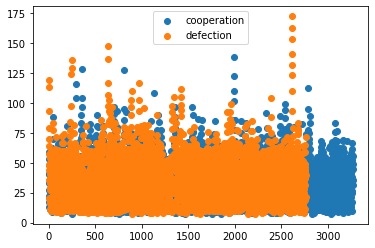

In [3]:
#seperate reaction times for cooperation vs defection
coop_rt = []
defect_rt = []

for twin in twins:
    c=TRIAL_START
    while c<TRIAL_END:
        if twin[c][1] == "C":
            coop_rt.append(twin[c+1])
        else:
            defect_rt.append(twin[c+1])
        c+=2

#plot distributions
x_coop = range(len(coop_rt))
x_defect = range(len(defect_rt))

plt.scatter(x_coop,coop_rt, label="cooperation")
plt.scatter(x_defect,defect_rt, label="defection")
plt.legend(loc="upper center")
plt.show()

In [4]:
def getAvgRT(col):
    coop_avgs = {}
    for twin in twins:
        i = twin[col]
        c = TRIAL_START
        while c<TRIAL_END:
            if i in coop_avgs:
                if twin[c][1] == "C":
                    coop_avgs[i] += [twin[c+1]]
            else:
                if twin[c][1] == "C":
                    coop_avgs[i] = [twin[c+1]]
            c+=2
    
    defect_avgs = {}
    for twin in twins:
        i = twin[col]
        c = TRIAL_START
        while c<TRIAL_END:
            if i in defect_avgs:
                if twin[c][1] == "D":
                    defect_avgs[i] += [twin[c+1]]
            else:
                if twin[c][1] == "D":
                    defect_avgs[i] = [twin[c+1]]
            c+=2
    
    for key in coop_avgs:
        coop_avgs[key] = sum(coop_avgs[key])/len(coop_avgs[key])
    for key in defect_avgs:
        defect_avgs[key] = sum(defect_avgs[key])/len(defect_avgs[key])
    
    return coop_avgs,defect_avgs
    
def plotAvgs(col, xlabel, ylabel, title):
    coop_avgs,defect_avgs = getAvgRT(col)
    coop_agg_avgs,defect_agg_avgs = coop_avgs.items(),defect_avgs.items()
    coop_agg_avgs,defect_agg_avgs = sorted(coop_agg_avgs),sorted(defect_agg_avgs)
    coop_x, coop_y = zip(*coop_agg_avgs)
    defect_x, defect_y = zip(*defect_agg_avgs)

    plt.plot(coop_x, coop_y, label = "cooperate")
    plt.plot(defect_x, defect_y, label = "defect")
    plt.legend(loc="upper right")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()


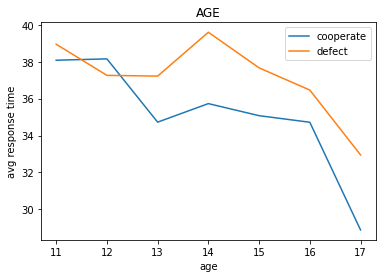

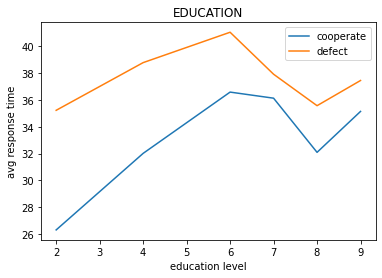

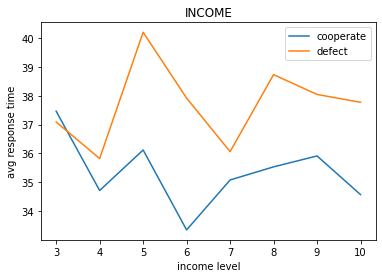

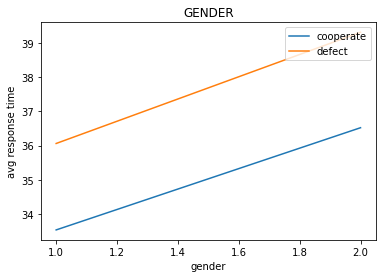

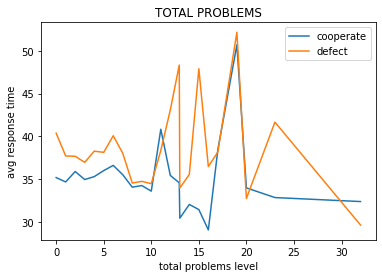

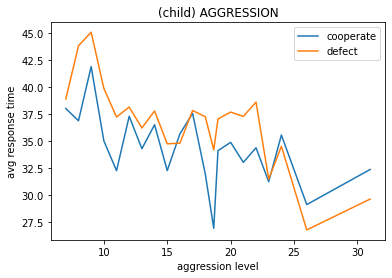

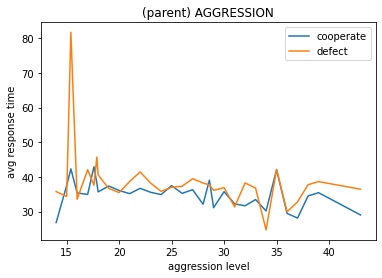

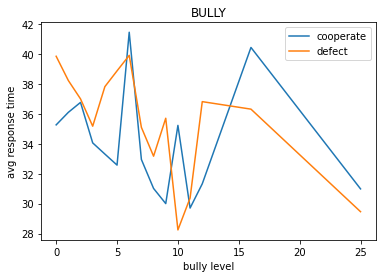

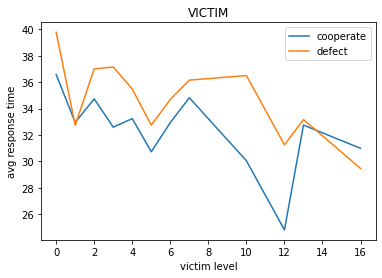

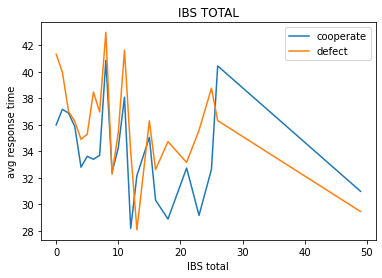

In [5]:
plotAvgs(1, "age", "avg response time", "AGE")
plotAvgs(2, "education level", "avg response time", "EDUCATION")
plotAvgs(3, "income level", "avg response time", "INCOME")
plotAvgs(4, "gender", "avg response time", "GENDER")
plotAvgs(11, "total problems level", "avg response time", "TOTAL PROBLEMS")
plotAvgs(12, "aggression level", "avg response time", "(child) AGGRESSION")
plotAvgs(13, "aggression level", "avg response time", "(parent) AGGRESSION")
plotAvgs(14, "bully level", "avg response time", "BULLY")
plotAvgs(15, "victim level", "avg response time", "VICTIM")
plotAvgs(19, "IBS total", "avg response time", "IBS TOTAL")

In [6]:
# calculate relative rt's and counts (coop rt / defect rt, coop count / defect count)
# DO NOT RUN MORE THAN ONCE

for twin in twins:
    coop = 0
    defect = 0
    coop_rt = []
    defect_rt = []
    c = TRIAL_START
    while c<TRIAL_END:
        if twin[c][1] == "C":
            coop += 1
            coop_rt += [twin[c+1]]
        else:
            defect += 1
            defect_rt += [twin[c+1]]
        c+=2
        
    coop_rt_avg, defect_rt_avg = sum(coop_rt)/len(coop_rt), sum(defect_rt)/len(defect_rt)
    twin.append(coop_rt_avg / defect_rt_avg)
    twin.append(coop/defect)
    
headers.append("relative decision count")
headers.append("relative rt")

TRIAL_END += 2

In [7]:
print(len(twins[1]))
print(TRIAL_END)

82
81


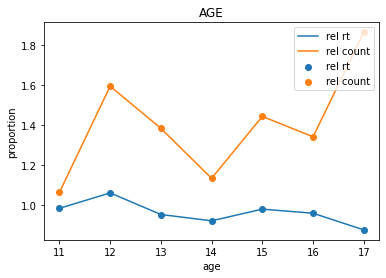

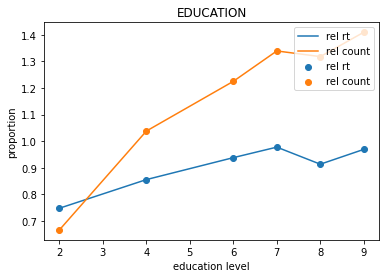

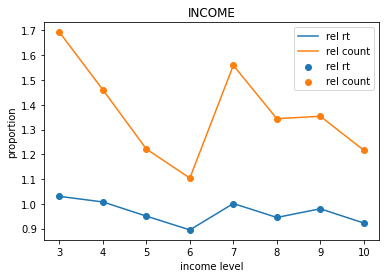

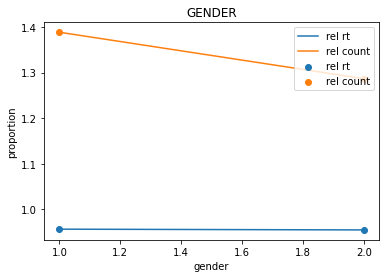

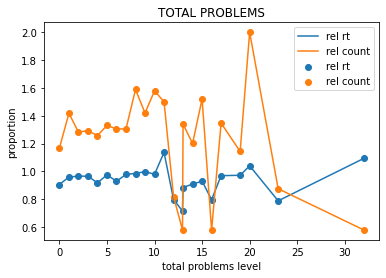

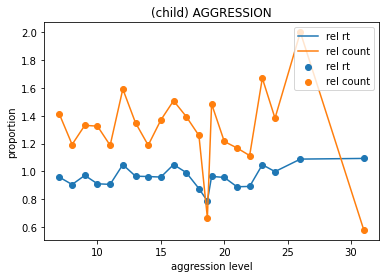

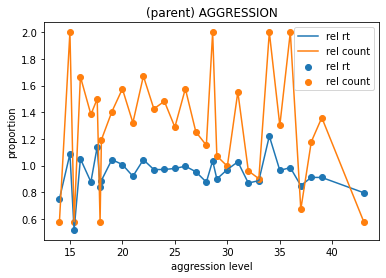

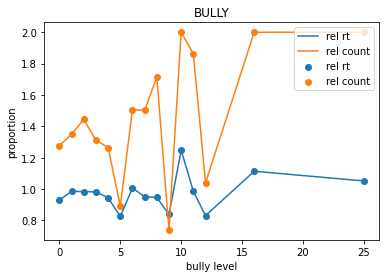

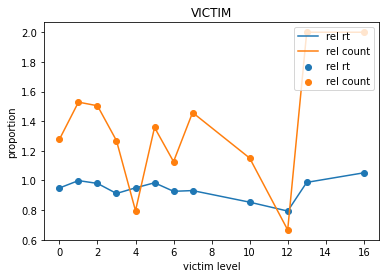

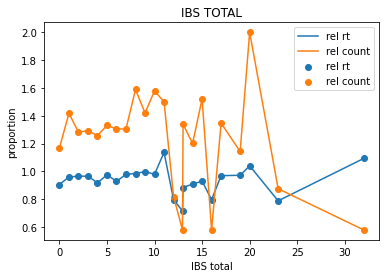

In [8]:
# plot relative distributions
def getRelAvg(col):
    rt_avgs = {}
    count_avgs = {}
    for twin in twins:
        i = twin[col]
        if i in rt_avgs:
            rt_avgs[i] += [twin[TRIAL_END-1]]
            count_avgs[i] += [twin[TRIAL_END]]
        else:
            rt_avgs[i] = [twin[TRIAL_END-1]]
            count_avgs[i] = [twin[TRIAL_END]]
    
    for key in rt_avgs:
        rt_avgs[key] = sum(rt_avgs[key])/len(rt_avgs[key])
    for key in count_avgs:
        count_avgs[key] = sum(count_avgs[key])/len(count_avgs[key])
    
    return rt_avgs,count_avgs

def plotRelAvgs(col, xlabel, title):
    rt_avgs,count_avgs = getRelAvg(col)
    rt_agg_avgs,count_agg_avgs = rt_avgs.items(),count_avgs.items()
    rt_agg_avgs,count_agg_avgs = sorted(rt_agg_avgs),sorted(count_agg_avgs)
    rt_x, rt_y = zip(*rt_agg_avgs)
    count_x, count_y = zip(*count_agg_avgs)
    
    plt.plot(rt_x, rt_y, label = "rel rt")
    plt.plot(count_x, count_y, label = "rel count")
    plt.scatter(rt_x, rt_y, label = "rel rt")
    plt.scatter(count_x, count_y, label = "rel count")
    plt.legend(loc="upper right")
    plt.xlabel(xlabel)
    plt.ylabel("proportion")
    plt.title(title)
    plt.show()

plotRelAvgs(1,"age", "AGE")
plotRelAvgs(2,"education level", "EDUCATION")
plotRelAvgs(3,"income level", "INCOME")
plotRelAvgs(4,"gender", "GENDER")
plotRelAvgs(11,"total problems level", "TOTAL PROBLEMS")
plotRelAvgs(12,"aggression level", "(child) AGGRESSION")
plotRelAvgs(13,"aggression level", "(parent) AGGRESSION")
plotRelAvgs(14,"bully level", "BULLY")
plotRelAvgs(15,"victim level", "VICTIM")
plotRelAvgs(11,"IBS total", "IBS TOTAL")

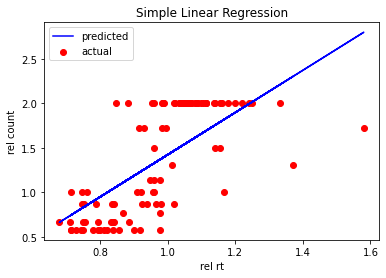

In [9]:
#split twins for training and testing
twins1 = []
twins2 = []

for twin in twins:
    if twin[5] == 1:
        twins1 += [twin]
    else:
        twins2 += [twin]

# simple linear regression model (rel rt against rel count)
x_twins1 = np.array([twin[TRIAL_END-1] for twin in twins1])
x_twins1 = x_twins1.reshape(-1,1)
y_twins1 = np.array([twin[TRIAL_END] for twin in twins1])
y_twins1 = y_twins1.reshape(-1,1)

x_twins2 = np.array([twin[TRIAL_END-1] for twin in twins2])
x_twins2 = x_twins2.reshape(-1,1)
y_twins2 = np.array([twin[TRIAL_END] for twin in twins2])
y_twins2 = y_twins2.reshape(-1,1)


regr = linear_model.LinearRegression()
regr.fit(x_twins1, y_twins1)
y_pred_twins2 = regr.predict(x_twins2)

plt.scatter(x_twins2, y_twins2, color='red', label="actual")
plt.plot(x_twins2, y_pred_twins2, color='blue', label="predicted")
plt.legend(loc="upper left")
plt.xlabel("rel rt")
plt.ylabel("rel count")
plt.title("Simple Linear Regression")
plt.show()

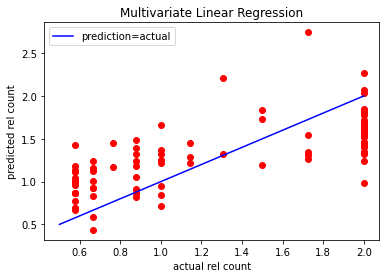

In [17]:
# Multivariate Linear Regression
x_twins1 = np.array([[twin[TRIAL_END-1] for twin in twins1], [twin[1] for twin in twins1], [twin[2] for twin in twins1], \
                    [twin[3] for twin in twins1], [twin[12] for twin in twins1]])
x_twins1 = np.transpose(x_twins1)
y_twins1 = np.array([twin[TRIAL_END] for twin in twins1])

x_twins2 = np.array([[twin[TRIAL_END-1] for twin in twins2], [twin[1] for twin in twins2], [twin[2] for twin in twins2], \
                     [twin[3] for twin in twins2], [twin[12] for twin in twins2]])
x_twins2 = np.transpose(x_twins2)
y_twins2 = np.array([twin[TRIAL_END] for twin in twins2])


regr = linear_model.LinearRegression()
regr.fit(x_twins1, y_twins1)
y_pred_twins2 = regr.predict(x_twins2)

plt.scatter(y_twins2, y_pred_twins2, color='red')
plt.plot([.5,2],[.5,2], color='blue', label='prediction=actual')
plt.legend(loc="upper left")
plt.xlabel("actual rel count")
plt.ylabel("predicted rel count")
plt.title("Multivariate Linear Regression")
plt.show()



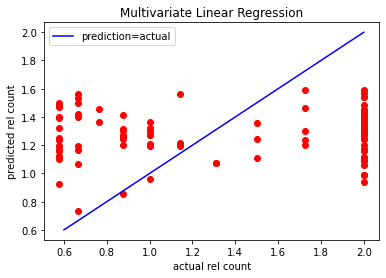

In [18]:
# Multivariate Linear Regression
x_twins1 = np.array([[twin[1] for twin in twins1], [twin[2] for twin in twins1], [twin[3] for twin in twins1], \
                     [twin[12] for twin in twins1], [twin[11] for twin in twins1], [twin[14] for twin in twins1], \
                     [twin[15] for twin in twins1]])
x_twins1 = np.transpose(x_twins1)
y_twins1 = np.array([twin[TRIAL_END] for twin in twins1])

x_twins2 = np.array([[twin[1] for twin in twins2], [twin[2] for twin in twins2], [twin[3] for twin in twins2], \
                     [twin[12] for twin in twins2], [twin[11] for twin in twins2], [twin[14] for twin in twins2], \
                     [twin[15] for twin in twins2]])
x_twins2 = np.transpose(x_twins2)
y_twins2 = np.array([twin[TRIAL_END] for twin in twins2])


regr = linear_model.LinearRegression()
regr.fit(x_twins1, y_twins1)
y_pred_twins2 = regr.predict(x_twins2)

plt.scatter(y_twins2, y_pred_twins2,  color='red')
plt.plot([.6,2],[.6,2], color='blue', label='prediction=actual')
plt.legend(loc="upper left")
plt.xlabel("actual rel count")
plt.ylabel("predicted rel count")
plt.title("Multivariate Linear Regression")
plt.show()

To continue working on:
- using correlation matrix or lasso for variable selection
- analyze "premeditated" defection (defect after partner cooperation)
- analyze repeated "retalitory" defection (defect after parnter defection)

In [12]:
premeditated = []
for twin in twins:
    count = 0
    c = TRIAL_START+1
    while c<(TRIAL_END):
        if twin[c][1] == 'D' and twin[c-1][0] == 'C':
            premidated.append(twin)
            break
    
                

TypeError: 'float' object is not subscriptable